<a href="https://colab.research.google.com/github/sapoepsilon/colorizeBlackandWhite/blob/main/ColoRISE_Superres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content')

In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2297, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 2297 (delta 33), reused 17 (delta 5), pack-reused 2228
Receiving objects: 100% (2297/2297), 69.44 MiB | 23.45 MiB/s, done.
Resolving deltas: 100% (1041/1041), done.


In [ ]:
cd DeOldify

/content/DeOldify


In [ ]:
from deoldify import device
from deoldify.device_id import DeviceId

device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [ ]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 5.3 MB/s 
     |████████████████████████████████| 129 kB 41.3 MB/s 
     |████████████████████████████████| 1.9 MB 24.6 MB/s 
     |████████████████████████████████| 78 kB 5.2 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=93ff51b0577d66a291d6793c352db785a2a66b823e31eecf6d79f96ee8942014
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [ ]:
!mkdir 'models'
!wget https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

--2021-11-15 20:31:11--  https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth [following]
--2021-11-15 20:31:11--  https://www.dropbox.com/s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc25386da807f9e14b17189ecdba.dl.dropboxusercontent.com/cd/0/inline/BaD4VvvvP0r-o95BlDv6j09iuANS0WsfbZsgeJ5Rxc66WgkwiJaJHu00IY41B6Vse8WY0no6uxdyE-4D810JsLGZRJhAB827QPA5OE6jWXOCgvsfNj6KR7mzyuxPzGRz0vyrjhNrLy_AIVOqNczJ8iJC/file# [following]
--2021-11-15 20:31:12--  https://uc25386da807f9e14b17189ecdba.dl.dropboxusercontent.com/cd/0/inline/BaD4VvvvP0r-o95BlDv6j09iuANS0WsfbZsgeJ5Rxc66WgkwiJaJH

In [ ]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-11-15 20:32:04--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-11-15 20:32:04 (58.2 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [ ]:
colorizer = get_image_colorizer(artistic=False)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential s

  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
### Upload Image Files ###

import os
from google.colab import files

os.chdir('/content/DeOldify/')
try:
  os.mkdir('IMAGES')
  print('Folder Made')
except:
  print('Folder Exists')
try:
  os.mkdir('Export')
  print('Folder Made')
except:
  print('Folder Exists')
os.chdir('/content/DeOldify/IMAGES')
uploaded = files.upload()
try:
  os.rmdir('.ipynb_checkpoints')
except:
  print('G2G')
image_files = os.listdir()
os.chdir('/content/DeOldify')
print(image_files)

Folder Made
Folder Made


Saving Buggies (48)_gray.jpg to Buggies (48)_gray.jpg
G2G
['Buggies (48)_gray.jpg']


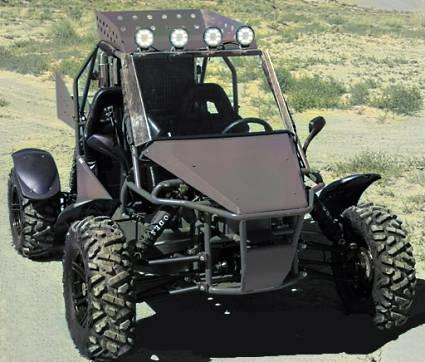

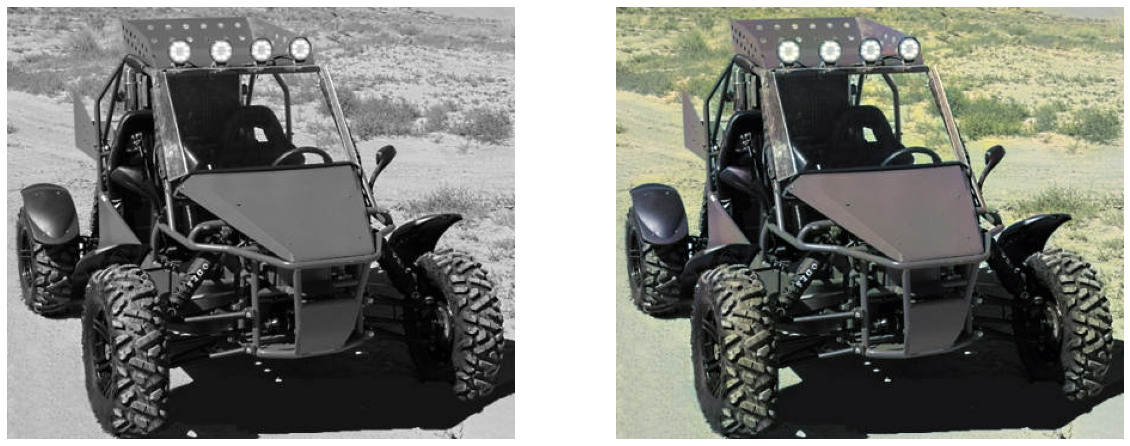

In [ ]:
import PIL
from PIL import Image

for image in image_files:
  os.chdir('/content/DeOldify')
  p= 'IMAGES/'+ image
  try:
    image_path = colorizer.plot_transformed_image(path=p, render_factor=40, compare=True, watermarked=False)
    show_image_in_notebook(image_path)
    picture = Image.open(image_path)
    os.chdir('/content/DeOldify/Export')
    picture = picture.save('COLORIZED_'+image)
  except:
    print(image + ' Is not a supported file type!')

In [ ]:
### Upscale Image ###

infile = "/content/DeOldify/IMAGES/Buggies (48)_gray.jpg"
outfile = "/content/DeOldify/IMAGES/test_resized.jpg"

basewidth = 300

im = Image.open(infile)
print (im.size)

# determining the height ratio
wpercent = (basewidth/float(im.size[0]))
hsize = int((float(im.size[1])*float(wpercent)))

size = (basewidth, hsize)

# Resize:
im.resize(size, Image.ANTIALIAS)
im.save(outfile, "JPEG")


(425, 362)


In [ ]:
! pip install opencv-contrib-python
import cv2

from cv2 import dnn_superres

# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read image
image = cv2.imread('./input.png')

# Read the desired model
path = "EDSR_x3.pb"
sr.readModel(path)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 3)


ImportError: ignored

In [ ]:
### CLEAR THE EXPORT FOLDER ###


'''
os.chdir('/content/DeOldify/Export/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
'''

In [ ]:
### CLEAR IMPORT IMAGE FOLDER ###


'''
os.chdir('/content/DeOldify/IMAGES/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
'''

In [ ]:
### CLEAR BOTH FOLDERS ###


'''
os.chdir('/content/DeOldify/Export/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
os.chdir('/content/DeOldify/IMAGES/')
file_list = os.listdir()
for image in file_list:
  try:
    os.remove(image)
  except:
    os.rmdir(image)
'''

In [ ]:
### DELETE PESKY FOLDERS ###
### USE Linux Bash Commands ###


'''
!cd /content/DeOldify/IMAGES/
!rm -rf /content/DeOldify/IMAGES/DeOldify
'''